# Un petit exercice d'application des SVM

### Partie 1 :  classifieur linéaire

1. Importer les données Social_Network_Ads.csv et regarder ce qu'elles contiennent
2. On utilisera dans un premier temps (par souci de visualisation) uniquement les 2 variables numériques du dataset comme features
3. Diviser le dataset en training/test set
4. Entraîner un classifieur linéaire (LinearSVC et SVC avec kernel='linear'. Quelle différence ?)
5. Faire de nouvelles prédictions sur X_test
6. Afficher la matrice de confusion avec heatmap
7. Faire le graphique affichant la frontière de décision, les zones en couleur et les points du dataset
8. Recommencer les étapes 4, 5, 6 et 7 en effectuant une normalisation sur les features
9. Recommencer les étapes 4,5 et 6 en intégrant les autres données disponibles dans votre matrice X et comparer les modèles

In [1]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


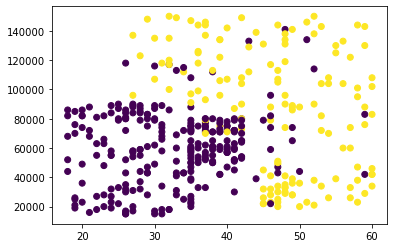

In [24]:
plt.scatter(X.Age,X.EstimatedSalary, c=y);

In [3]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [4]:
# Ajouter l'étape de Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construction du modèle
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

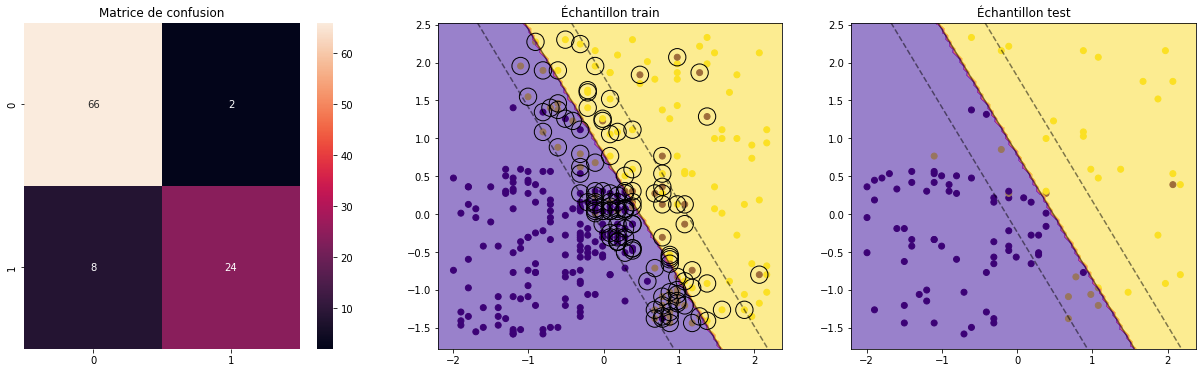

In [5]:
# Visualiser des résultats et de la matrice de confusion
from sklearn.metrics import confusion_matrix
from utils import frontiere

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(21,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title('Matrice de confusion')

ax2.scatter(X_train[:,0], X_train[:,1], c=y_train)
frontiere(classifier, ax=ax2)
ax2.set_title('Échantillon train')

ax3.scatter(X_test[:,0], X_test[:,1], c=y_test)
frontiere(classifier, ax=ax3, supp_vect=False)
ax3.set_title('Échantillon test');

/home/elka/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X doe

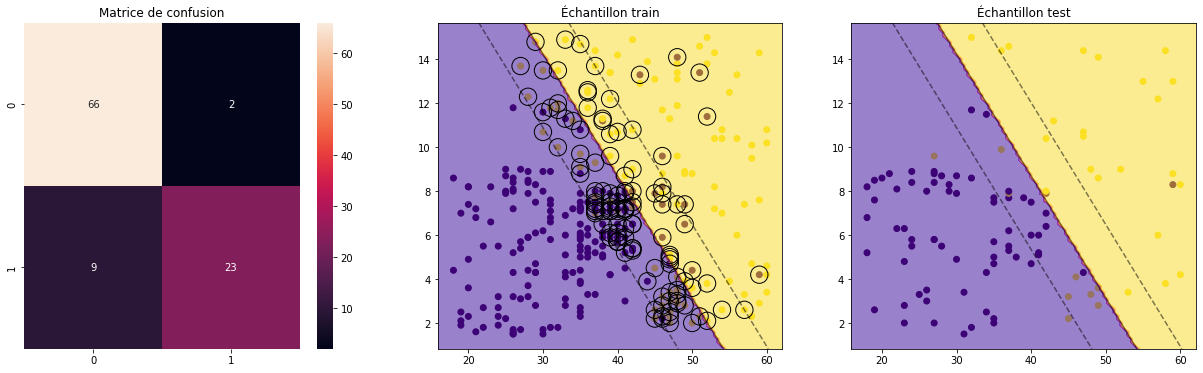

In [6]:
# La méthode de Thomas : on ramène sur une échelle similaire les features
# en divisant le salaire par 10000

# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']
dataset.head()

X.EstimatedSalary = X.EstimatedSalary/10000

# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Construction du modèle
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

# Visualiser des résultats et de la matrice de confusion
from sklearn.metrics import confusion_matrix
from utils import frontiere

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(21,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title('Matrice de confusion')

ax2.scatter(X_train.Age, X_train.EstimatedSalary, c=y_train)
frontiere(classifier, ax=ax2)
ax2.set_title('Échantillon train')

ax3.scatter(X_test.Age, X_test.EstimatedSalary, c=y_test)
frontiere(classifier, ax=ax3, supp_vect=False)
ax3.set_title('Échantillon test');

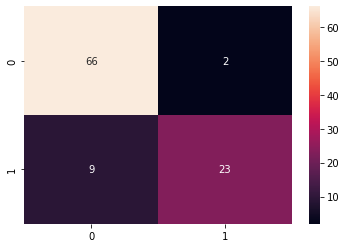

In [7]:
# On recommence avec toutes les infos disponibles (le genre en plus)
# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = pd.concat((dataset[['Age','EstimatedSalary']],
               pd.get_dummies(dataset.Gender, drop_first=True)),
              axis=1)
y = dataset['Purchased']

# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Ajouter l'étape de Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construction du modèle
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

# Visualiser la matrice de confusion
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

### Partie 2 :  classifieur non-linéaire

On repart du même dataset initial avec dans un premier temps uniquement les 2 variables numériques du dataset.
1. Diviser le dataset en training/test set
2. Normaliser les features
3. Entraîner un classifieur SVC : tester les deux kernel='rbf' et 'poly'
4. Faire de nouvelles prédictions sur X_test
5. Afficher la matrice de confusion avec heatmap
6. Faire le graphique affichant la frontière de décision, les zones en couleur et les points du dataset (pour chaque kernel !)
7. Recommencer les étapes 4,5 et 6 en intégrant les autres données disponibles dans votre matrice X et comparer les modèles

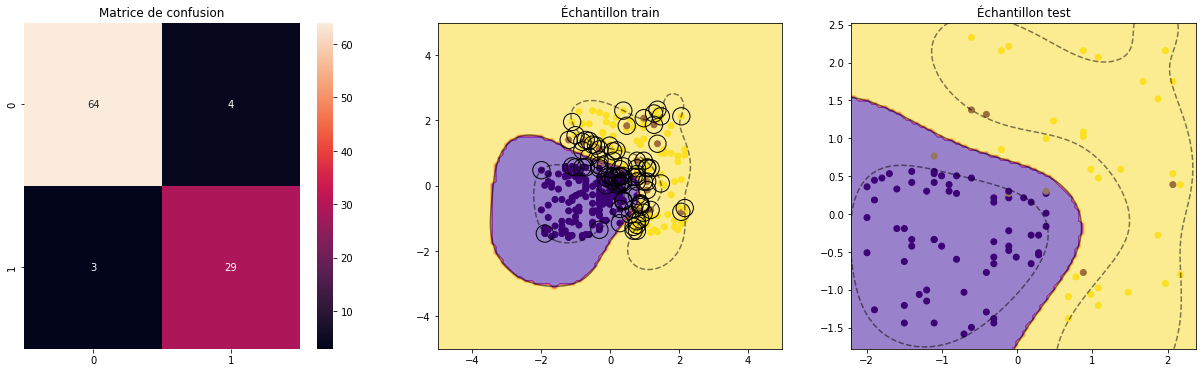

In [37]:
# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']
dataset.head()

# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Ajouter l'étape de Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construction du modèle
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

# Visualiser des résultats et de la matrice de confusion
from sklearn.metrics import confusion_matrix
from utils import frontiere

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(21,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title('Matrice de confusion')

ax2.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
frontiere(classifier, ax=ax2)On repart du même dataset initial avec dans un premier temps uniquement les 2 variables numériques du datas
ax2.set_title('Échantillon train')

ax3.scatter(X_test[:,0], X_test[:,1], c=y_test)
frontiere(classifier, ax=ax3, supp_vect=False)
ax3.set_title('Échantillon test');

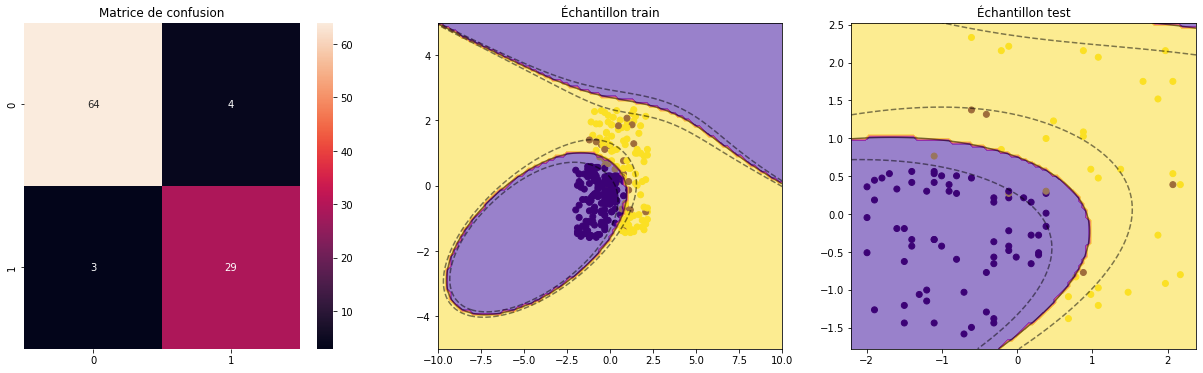

In [33]:
# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']
dataset.head()

# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Ajouter l'étape de Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construction du modèle
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree=3, coef0=1, random_state = 0)
classifier.fit(X_train, y_train)

# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

# Visualiser des résultats et de la matrice de confusion
from sklearn.metrics import confusion_matrix
from utils import frontiere

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(21,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title('Matrice de confusion')

ax2.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax2.set_xlim(-10,10)
ax2.set_ylim(-5,5)
frontiere(classifier, ax=ax2, supp_vect=False)
ax2.set_title('Échantillon train')

ax3.scatter(X_test[:,0], X_test[:,1], c=y_test)
frontiere(classifier, ax=ax3, supp_vect=False)
ax3.set_title('Échantillon test');

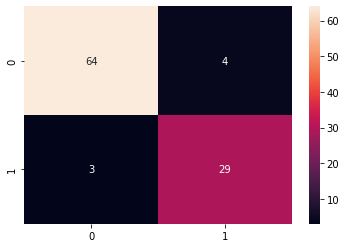

In [36]:
# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = pd.concat((dataset[['Age','EstimatedSalary']],
               pd.get_dummies(dataset.Gender, drop_first=True)),
              axis=1)
y = dataset['Purchased']

# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Ajouter l'étape de Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construction du modèle
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)

# Visualiser des résultats et de la matrice de confusion
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);